In [45]:
import os
from skimage import io
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import shutil
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
batch_size = 32
img_height = 300
img_width = 200

In [3]:
num_classes = 3
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 7, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [13]:
new_model = tf.keras.models.load_model('../Capstone3/mymodel_25/')

# Check its architecture
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 300, 200, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 300, 200, 32)      4736      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 150, 100, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 150, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 75, 50, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 75, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 37, 25, 128)     

In [20]:
def get_model_name():
    import time
    run=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return run

In [21]:
recall=tf.keras.metrics.Recall(class_id=None)

In [22]:
root_logdir=os.path.join(os.curdir, 'my_logs')

In [23]:
def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [24]:
run_logdir=get_run_logdir()

In [25]:
model_name=get_model_name()

In [26]:
model_name

'run_2021_01_08-20_41_55'

In [27]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-5 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 30 epochs"
        patience=30,
        verbose=1,), 
    keras.callbacks.TensorBoard(run_logdir,
                              histogram_freq=2,
                              write_graph=True,
                              write_images=True),
    keras.callbacks.ModelCheckpoint(filepath=model_name+"epoch_{epoch}",save_best_only=True)]

In [28]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=20, width_shift_range=0.1,
    height_shift_range=0.1, fill_mode='nearest', cval=0.0,
    horizontal_flip=True, vertical_flip=False)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator()

In [29]:
train_generator = train_datagen.flow_from_directory(
        'plants/train',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'plants/val',
        target_size=(300, 200),
        batch_size=32,
        class_mode='categorical')

Found 1968 images belonging to 3 classes.
Found 422 images belonging to 3 classes.


In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[recall])

In [31]:
epochs=200
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[callbacks])

Epoch 1/200
 1/62 [..............................] - ETA: 0s - loss: 1.1016 - recall_2: 0.0000e+00WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
62/62 [==============================] - ETA: 0s - loss: 1.0465 - recall_2: 0.5864WARNING:tensorflow:From /Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets w

Epoch 33/200
62/62 [==============================] - 118s 2s/step - loss: 0.6427 - recall_2: 0.6972 - val_loss: 0.6373 - val_recall_2: 0.7299
Epoch 34/200
62/62 [==============================] - 113s 2s/step - loss: 0.6251 - recall_2: 0.7068 - val_loss: 0.6448 - val_recall_2: 0.7062
Epoch 35/200
62/62 [==============================] - 116s 2s/step - loss: 0.6479 - recall_2: 0.6880 - val_loss: 0.6412 - val_recall_2: 0.7251
Epoch 36/200
62/62 [==============================] - 113s 2s/step - loss: 0.6425 - recall_2: 0.6987 - val_loss: 0.6578 - val_recall_2: 0.7204
Epoch 37/200
62/62 [==============================] - 116s 2s/step - loss: 0.6376 - recall_2: 0.7043 - val_loss: 0.7300 - val_recall_2: 0.7180
Epoch 38/200
62/62 [==============================] - 112s 2s/step - loss: 0.6281 - recall_2: 0.7129 - val_loss: 0.6745 - val_recall_2: 0.7180
Epoch 39/200
62/62 [==============================] - 117s 2s/step - loss: 0.6158 - recall_2: 0.7205 - val_loss: 0.6576 - val_recall_2: 0.7180

Epoch 85/200
62/62 [==============================] - 116s 2s/step - loss: 0.4358 - recall_2: 0.8201 - val_loss: 0.7450 - val_recall_2: 0.7536
Epoch 86/200
62/62 [==============================] - 112s 2s/step - loss: 0.3939 - recall_2: 0.8364 - val_loss: 0.7020 - val_recall_2: 0.7678
Epoch 87/200
62/62 [==============================] - 116s 2s/step - loss: 0.3767 - recall_2: 0.8450 - val_loss: 0.7186 - val_recall_2: 0.7370
Epoch 88/200
62/62 [==============================] - 112s 2s/step - loss: 0.3957 - recall_2: 0.8450 - val_loss: 0.7478 - val_recall_2: 0.7701
Epoch 89/200
62/62 [==============================] - 116s 2s/step - loss: 0.4073 - recall_2: 0.8283 - val_loss: 0.7878 - val_recall_2: 0.7607
Epoch 90/200
62/62 [==============================] - 112s 2s/step - loss: 0.3913 - recall_2: 0.8354 - val_loss: 0.7388 - val_recall_2: 0.7796
Epoch 91/200
62/62 [==============================] - 116s 2s/step - loss: 0.3742 - recall_2: 0.8440 - val_loss: 0.7250 - val_recall_2: 0.7749

In [35]:
mkdir graphs

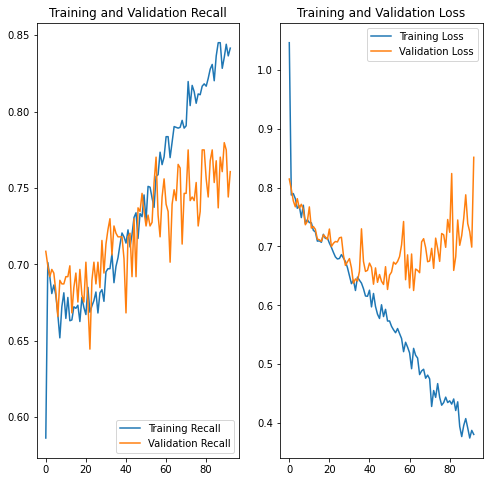

In [37]:
acc = history.history['recall_2']
val_acc = history.history['val_recall_2']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Recall')
plt.plot(epochs_range, val_acc, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('graphs/simplemodel128.png', bbox_inches='tight')
plt.show()

In [38]:
test_generator = test_datagen.flow_from_directory(
        'plants/test',
        target_size=(300, 200),
        batch_size=16,
        shuffle=False,
        class_mode='categorical')

Found 424 images belonging to 3 classes.


In [39]:
ben_plants = os.listdir('plants/test/Benign_Plants')
ivy=os.listdir('plants/test/Poison_Ivy/')
oak=os.listdir('plants/test/Poison_Oak')

In [40]:
y_true=pd.DataFrame()
for i in range(len(ben_plants)):
    num=pd.Series([1,0,0])
    y_true= y_true.append(num, ignore_index=True)
for j in range(len(ivy)):
    num=pd.Series([0,1,0])
    y_true= y_true.append(num, ignore_index=True)
for k in range(len(oak)):
    num=pd.Series([0,0,1])
    y_true= y_true.append(num, ignore_index=True)

In [41]:
y_hat=(model.predict(test_generator, verbose=1))

27/27 [==============================] - 6s 224ms/step


In [42]:
y_pred=np.argmax(y_hat, axis=1)
y_s=np.argmax(np.array(y_true), axis=1)

In [43]:
c_mat=confusion_matrix(y_s, y_pred)

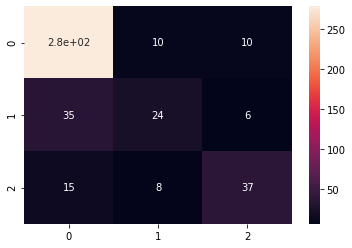

In [46]:
sns.heatmap(c_mat, annot=True)

In [47]:
percent=(c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))).reshape(3,3)

In [48]:
c_mat/(np.sum(c_mat, axis=1).reshape(3,-1))

array([[0.93311037, 0.03344482, 0.03344482],
       [0.53846154, 0.36923077, 0.09230769],
       [0.25      , 0.13333333, 0.61666667]])

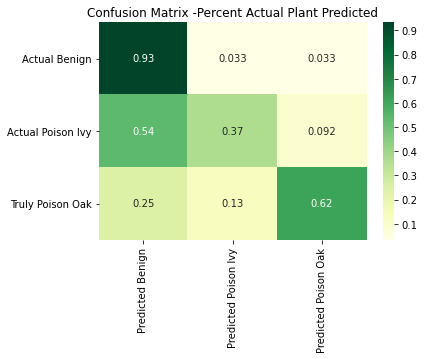

In [55]:
predicted_cat=['Predicted Benign', 'Predicted Poison Ivy', 'Predicted Poison Oak']
real_cat=['Actual Benign', 'Actual Poison Ivy', 'Truly Poison Oak']
sns.heatmap(percent, annot=percent, cmap='YlGn', 
            xticklabels=predicted_cat, 
            yticklabels=real_cat).set_title('Confusion Matrix -Percent Actual Plant Predicted');
plt.savefig('graphs/simplemodel128.png', bbox_inches='tight')